In [28]:
import pandas as pd
import numpy as np
import io
import os
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import datetime
import json

In [29]:
class file_PXRD:
    
    def read_file(self, path, filename):
        self.filename = filename
        if filename.split('.')[-1].upper() == 'XML':
            self.instrument = 'PROTO'
            with open(path + filename , 'r') as f:
                y=BeautifulSoup(f.read())
            self.data = pd.DataFrame({'two_theta':[float(x['x']) for x in y.find_all('intensity')],
                                     'intensity':[float(x['cps']) for x in y.find_all('intensity')]})
            self.radiation = [x.get_text() for x in y.find_all('tube')][0]
            self.duration = [x.get_text() for x in y.find_all('totaltime')][0]
        
        if filename.split('.')[-1].upper() == 'XRDML':
            self.instrument = 'EMPYREAN'
            with open(path + filename , 'r') as f:
                y=BeautifulSoup(f.read())
            self.data = pd.DataFrame({'two_theta':np.linspace(float([x.get_text() for x in y.find_all('startposition')][0]), 
                                                  float([x.get_text() for x in y.find_all('endposition')][0]), 
                                                  num=len(re.findall('[0-9]+',str([x for x in y.find_all('intensities')])))),
                                      'intensity':[int(i) for i in re.findall('[0-9]+',str([x for x in y.find_all('intensities')]))]})
            self.radiation = [x.get_text() for x in y.find_all('anodematerial')][0]
            self.duration = str(datetime.fromisoformat([x.get_text() for x in y.find_all('endtimestamp')][0]) \
                                - datetime.fromisoformat([x.get_text() for x in y.find_all('starttimestamp')][0]))

        # test if import was correct
        if (list(self.__dict__.keys()) == ['filename', 'instrument', 'data', 'radiation', 'duration']) :
            print('File {0} read succesfull'.format(filename))
            self.import_success = True
        else:
            self.import_success = False

            
class file_PXRDcalc:
    
    def read_file(self, path, filename):
        self.filename = 'Calculated PXRD, '+filename[:-4]
        self.data = pd.read_csv(path + filename, names = ['two_theta', 'intensity', 'error'], sep='\s+', skiprows=1)

        # test if import was correct
        if (list(self.__dict__.keys()) == ['filename', 'data']) :
            print('File {0} read succesfull'.format(filename))
            self.import_success = True
        else:
            self.import_success = False

File Abscan-file_ROS-037_25.000000000000000°C.xrdml read succesfull
File calc/MABJUV.cifpxrd read succesfull


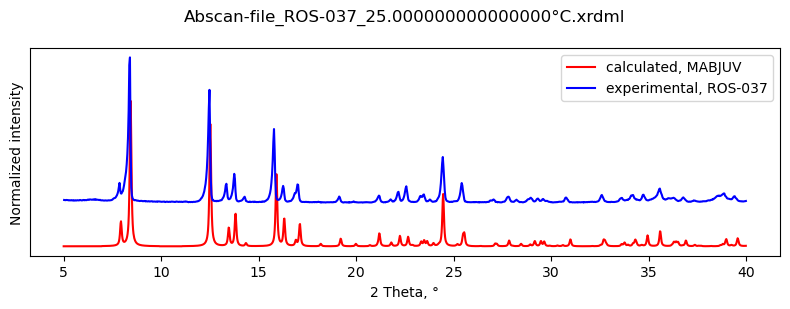

File WS3.xrdml read succesfull
File calc/AWAREV.cifpxrd read succesfull


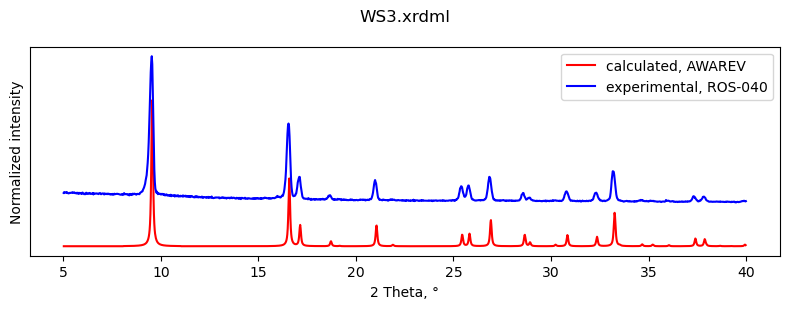

File WS2_18.xrdml read succesfull
File calc/LATPIG.cifpxrd read succesfull


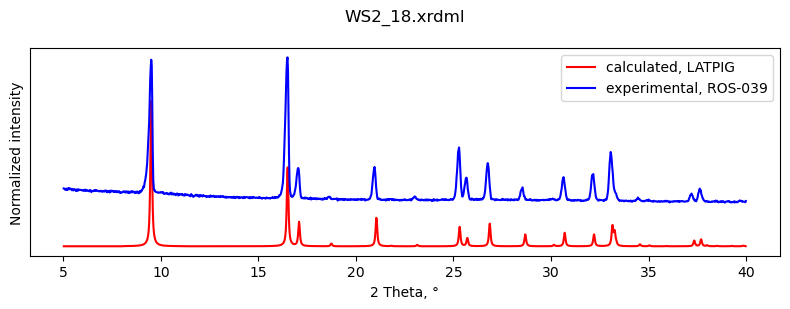

File Syngenta_3-40_7min_DJ2500_MIL-160_AS_4.xrdml read succesfull
File calc/PIBZOS.cifpxrd read succesfull


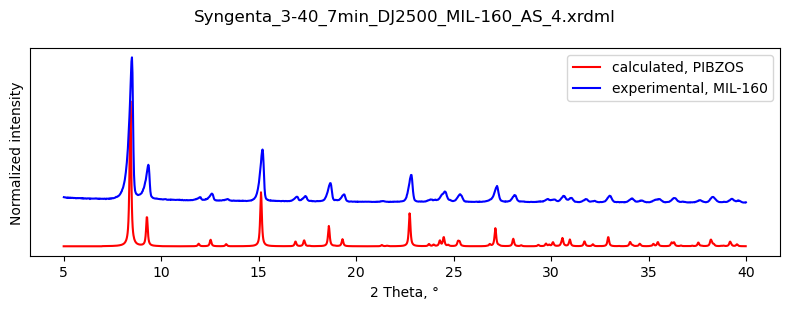

File SS-1131-MOF-303.xrdml read succesfull
File calc/RUNDIQ.cifpxrd read succesfull


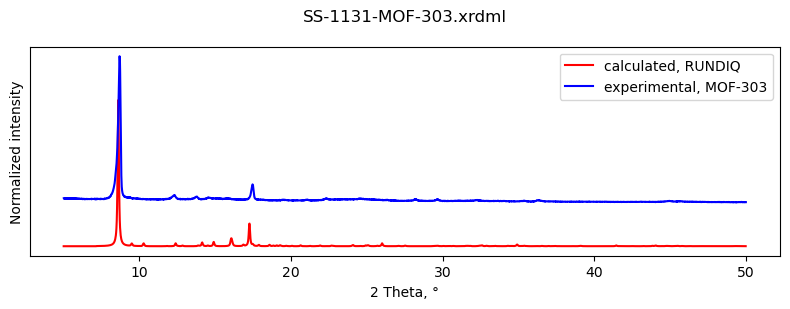

File Gonio_3-60 15 min_AAB-3-96_after_sorption_1.xrdml read succesfull
File calc/XEJWUG.cifpxrd read succesfull


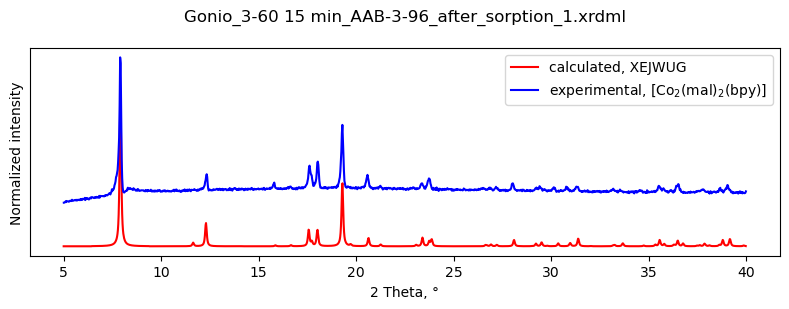

File 20_06_24_0006_AAB_3_103.xml read succesfull
File calc/BEVRAW.cifpxrd read succesfull


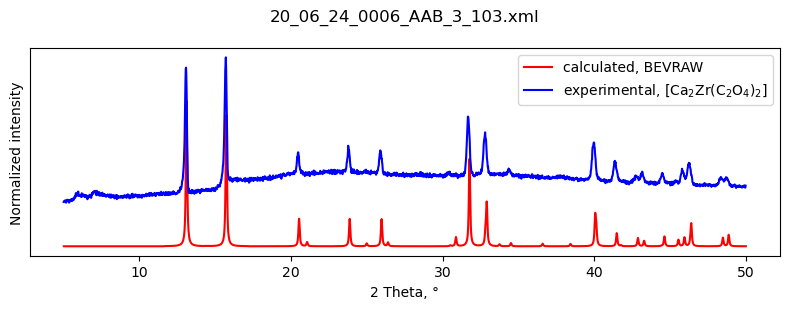

File 20_07_06_0008_AAB-3-107.xml read succesfull
File calc/XEJXAN.cifpxrd read succesfull


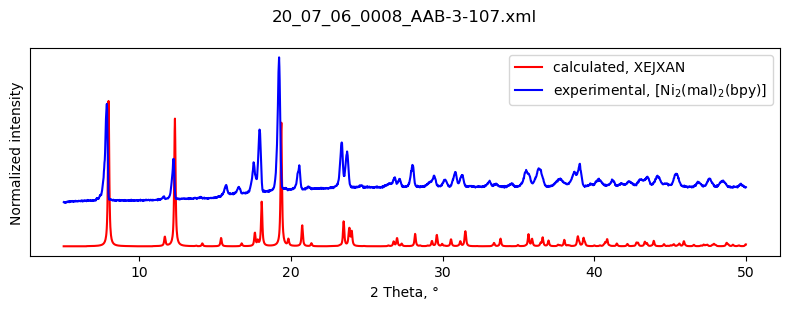

File AbScan-BaseProg_AAB_2_108.xrdml read succesfull
File calc/KINGUM.cifpxrd read succesfull


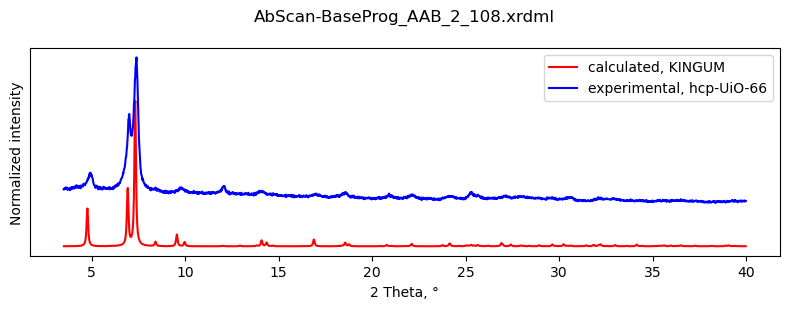

File AbScan-BaseProg_AAB_3_03.xrdml read succesfull
File calc/NUDLIJ.cifpxrd read succesfull


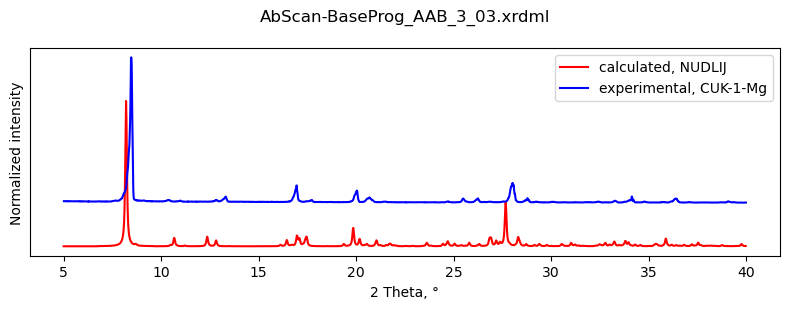

File Gonio_3-60 15 min_AAB-3-80-82_1.xrdml read succesfull
File calc/RUBTAK.cifpxrd read succesfull


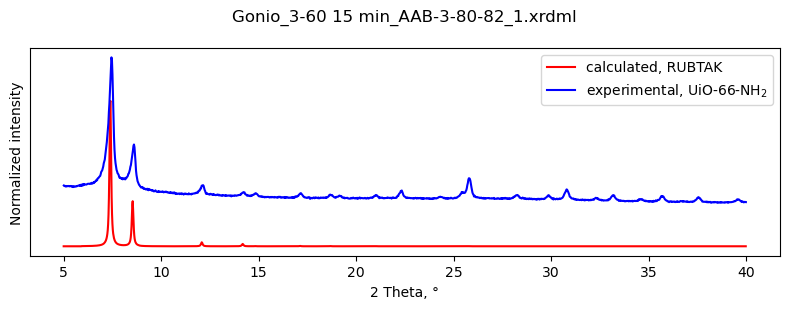

File SS-2-1232.xrdml read succesfull
File calc/CIGXIA.cifpxrd read succesfull


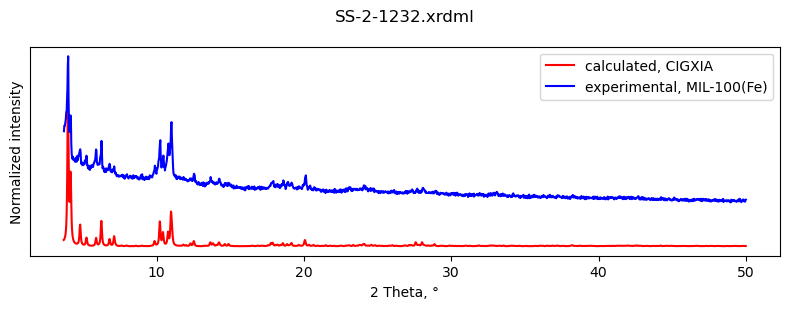

File sql-1-Co-NCSTFT_6.xrdml read succesfull
File calc/VIBQOP.cifpxrd read succesfull


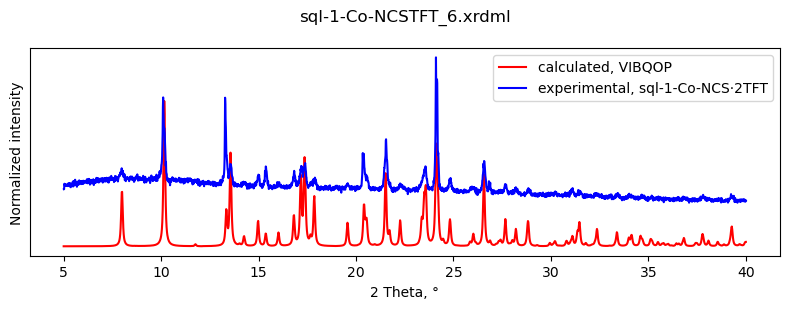

File sql-1CoNCS_activ 4.xrdml read succesfull
File calc/YUVROX01.cifpxrd read succesfull


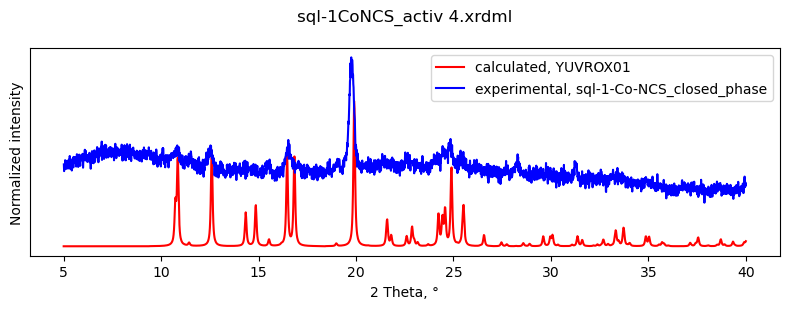

File FOPREH_4.xrdml read succesfull
File calc/FOPREH.cifpxrd read succesfull


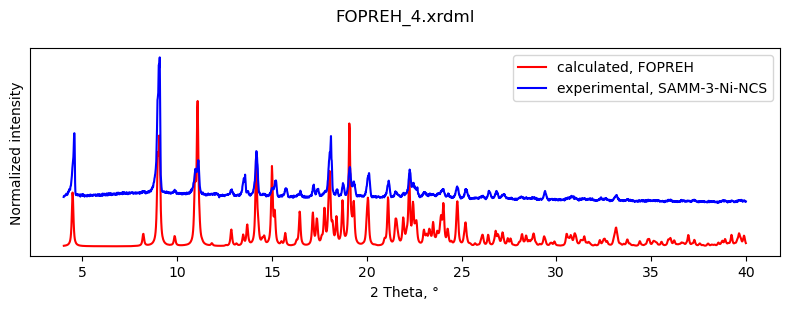

File MS-2005-12-as received sample.xrdml read succesfull
File calc/[Cu(HQS)(TMBP)].cifpxrd read succesfull


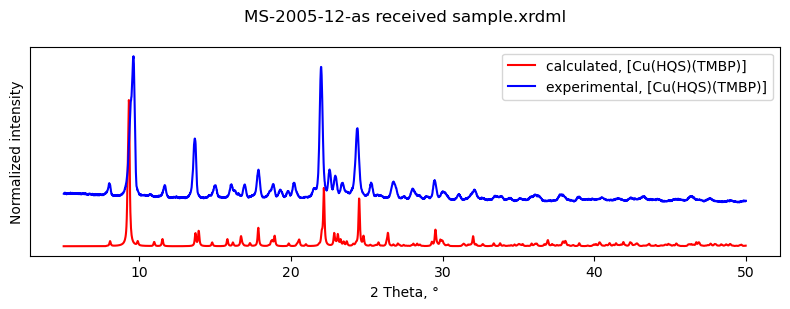

File AbScan_15min_4to40_AAB_6_35_1.xrdml read succesfull
File calc/1874235.cifpxrd read succesfull


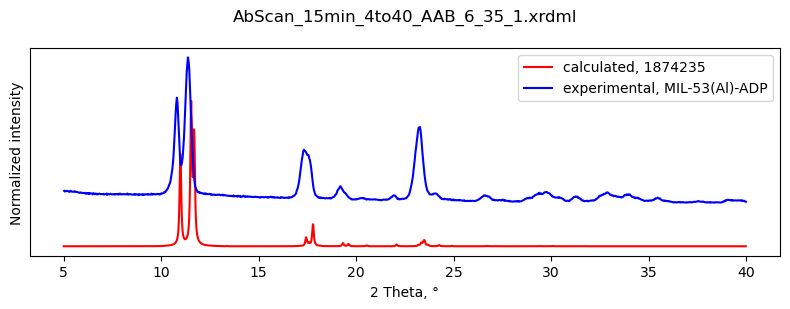

list index out of range
[Cd(pzdc)(azpy)] failed
File calc/EBEMEE.cifpxrd read succesfull


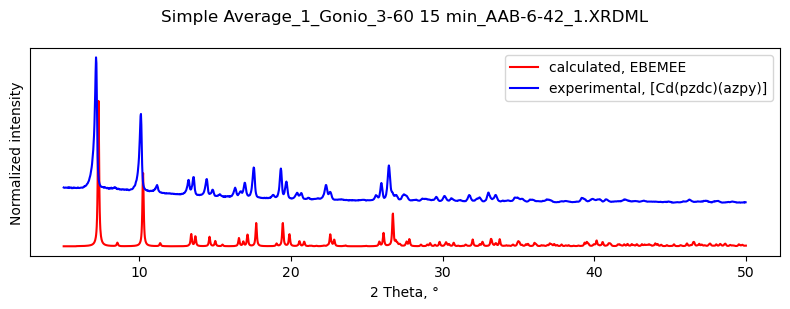

list index out of range
ZPF-2-Co failed
File calc/OTOFOV.cifpxrd read succesfull


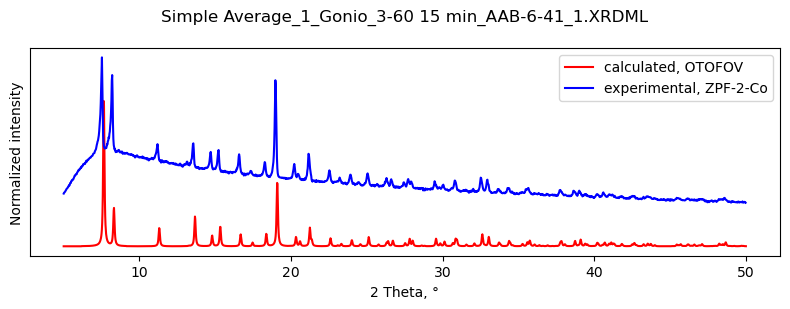

list index out of range
MIL-53(Al)-OH failed
File calc/SABWAU.cifpxrd read succesfull


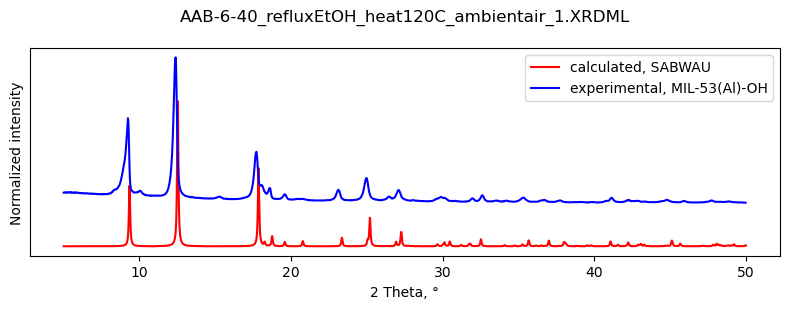

list index out of range
sql-(azpy)(pdia)-Ni_DCM failed
File calc/2178495.cifpxrd read succesfull


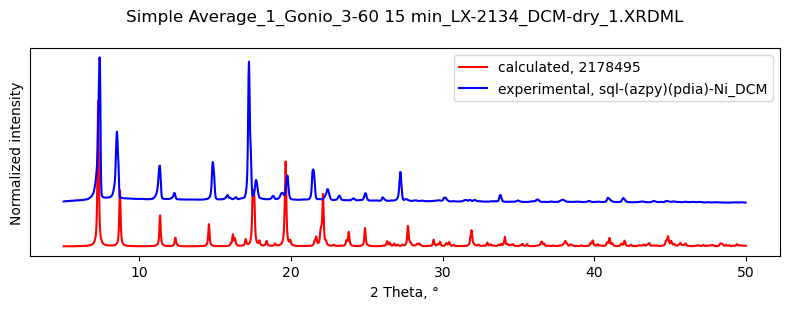

File Gonio_3-45 7 min_AAB-5-51_1.xrdml read succesfull
File calc/VELVIS.cifpxrd read succesfull


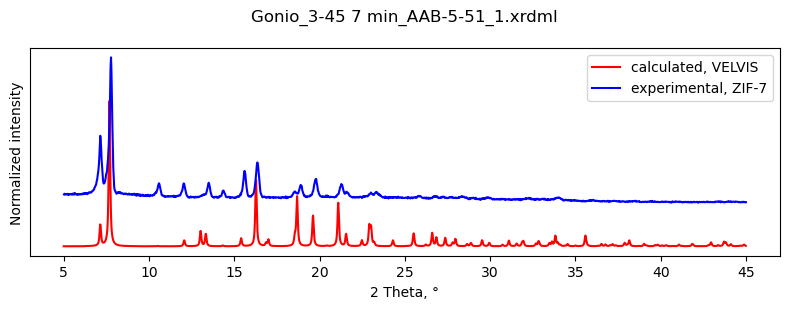

In [30]:
##################################################
####### main 
##################################################
filelist =  {'ROS-037':{'PXRD':'Abscan-file_ROS-037_25.000000000000000°C.xrdml',
                        'calc':'calc/MABJUV.cifpxrd',
                       },
             'ROS-040':{'PXRD':'WS3.xrdml',
                        'calc':'calc/AWAREV.cifpxrd',
                       },
             'ROS-039':{'PXRD':'WS2_18.xrdml',
                        'calc':'calc/LATPIG.cifpxrd',
                       },
             'MIL-160':{'PXRD':'Syngenta_3-40_7min_DJ2500_MIL-160_AS_4.xrdml',
                        'calc':'calc/PIBZOS.cifpxrd',
                       },
             'MOF-303':{'PXRD':'SS-1131-MOF-303.xrdml',
                        'calc':'calc/RUNDIQ.cifpxrd',
                       },
             '[Co$_{2}$(mal)$_{2}$(bpy)]':{'PXRD':'Gonio_3-60 15 min_AAB-3-96_after_sorption_1.xrdml',
                        'calc':'calc/XEJWUG.cifpxrd',
                       },
             '[Ca$_{2}$Zr(C$_{2}$O$_{4}$)$_{2}$]':{'PXRD':'20_06_24_0006_AAB_3_103.xml',
                        'calc':'calc/BEVRAW.cifpxrd',
                       },
             '[Ni$_{2}$(mal)$_{2}$(bpy)]':{'PXRD':'20_07_06_0008_AAB-3-107.xml',
                        'calc':'calc/XEJXAN.cifpxrd',
                       },
             'hcp-UiO-66':{'PXRD':'AbScan-BaseProg_AAB_2_108.xrdml',
                        'calc':'calc/KINGUM.cifpxrd',
                       },
             'CUK-1-Mg':{'PXRD':'AbScan-BaseProg_AAB_3_03.xrdml',
                        'calc':'calc/NUDLIJ.cifpxrd',
                       },
             'UiO-66-NH$_{2}$':{'PXRD':'Gonio_3-60 15 min_AAB-3-80-82_1.xrdml',
                        'calc':'calc/RUBTAK.cifpxrd',
                       },
             'MIL-100(Fe)':{'PXRD':'SS-2-1232.xrdml',
                        'calc':'calc/CIGXIA.cifpxrd',
                       },
             'sql-1-Co-NCS·2TFT':{'PXRD':'sql-1-Co-NCSTFT_6.xrdml',
                        'calc':'calc/VIBQOP.cifpxrd',
                       },
             'sql-1-Co-NCS_closed_phase':{'PXRD':'sql-1CoNCS_activ 4.xrdml',
                        'calc':'calc/YUVROX01.cifpxrd',
                       },
             'SAMM-3-Ni-NCS':{'PXRD':'FOPREH_4.xrdml',
                        'calc':'calc/FOPREH.cifpxrd',
                       },
             '[Cu(HQS)(TMBP)]':{'PXRD':'MS-2005-12-as received sample.xrdml',
                        'calc':'calc/[Cu(HQS)(TMBP)].cifpxrd',
                       },
             'MIL-53(Al)-ADP':{'PXRD':'AbScan_15min_4to40_AAB_6_35_1.xrdml',
                        'calc':'calc/1874235.cifpxrd',
                       },

             '[Cd(pzdc)(azpy)]':{'PXRD':'Simple Average_1_Gonio_3-60 15 min_AAB-6-42_1.XRDML',
                        'calc':'calc/EBEMEE.cifpxrd',
                       },
             'ZPF-2-Co':{'PXRD':'Simple Average_1_Gonio_3-60 15 min_AAB-6-41_1.XRDML',
                        'calc':'calc/OTOFOV.cifpxrd',
                       },
             'MIL-53(Al)-OH':{'PXRD':'AAB-6-40_refluxEtOH_heat120C_ambientair_1.XRDML',
                              'calc':'calc/SABWAU.cifpxrd'
                       },
            'sql-(azpy)(pdia)-Ni_DCM':{'PXRD':'Simple Average_1_Gonio_3-60 15 min_LX-2134_DCM-dry_1.XRDML',
                        'calc':'calc/2178495.cifpxrd',
                       },
             'ZIF-7':{'PXRD':'Gonio_3-45 7 min_AAB-5-51_1.xrdml',
                        'calc':'calc/VELVIS.cifpxrd',
                       }
             
             }


text_size = 16
path = '../../../../data/material_characterization/PXRD/'
for material_name in filelist.keys():
    ### import experimental  ###
    PXRD = file_PXRD()
    try:
        PXRD.read_file(path + '/', filelist[material_name]['PXRD'])
        if not PXRD.import_success:
            del PXRD
            print(material_name, 'failed')
    except Exception as e:
        print(e)
        print(material_name, 'failed')
        
    ### import calculated  ###
    PXRDcalc = file_PXRDcalc()
    try:
        PXRDcalc.read_file(path + '/',filelist[material_name]['calc'])
        if not PXRDcalc.import_success:
            del PXRDcalc
            print(material_name, 'failed')
    except Exception as e:
        print(e)
        print(material_name, 'failed')
    fig = plt.figure(figsize=(8,8*0.4))
    min_x = max(PXRD.data.two_theta.min(), PXRDcalc.data.two_theta.min())
    max_x = min(PXRD.data.two_theta.max(), PXRDcalc.data.two_theta.max())
    df = PXRDcalc.data[(PXRDcalc.data.two_theta>=min_x)&(PXRDcalc.data.two_theta<=max_x)]
    plt.plot(df.two_theta, 
             (df.intensity - df.intensity.min())/(df.intensity.max()-df.intensity.min()), 
             label='calculated, ' + PXRDcalc.filename.split('/')[1].split('.')[0], c='r')
    df = PXRD.data[(PXRD.data.two_theta>=min_x)&(PXRD.data.two_theta<=max_x)]
    plt.plot(df.two_theta, 
             (df.intensity - df.intensity.min())/(df.intensity.max()-df.intensity.min()) + 0.3, 
             label='experimental, ' + material_name, c='b')
    plt.xlabel('2 Theta, °')
    plt.ylabel('Normalized intensity')
    ax = plt.gca()
    #ax.axes.yaxis.set_ticklabels([])
    ax.set_yticks([])
    plt.title(PXRD.filename+'\n')
    plt.legend()
    fig.tight_layout()
    plt.savefig(PXRD.filename+'.png', dpi=300)
    plt.show()